In [1]:
"""
Team Gamma
COMP262
"""

'\nTeam Gamma\nCOMP262\n'

In [2]:
import os
import pandas as pd

In [3]:
current_path = os.getcwd()
data_name = 'Industrial_and_Scientific_5.json'
data_path = current_path + "/" + data_name

In [4]:
data = pd.read_json(data_path,orient='records',lines=True)

In [5]:
"""
1. Dataset data exploration: List the main finding of the dataset. Be thorough and creative.
For example, look at:
a. Counts, averages
"""

'\n1. Dataset data exploration: List the main finding of the dataset. Be thorough and creative.\nFor example, look at:\na. Counts, averages\n'

In [6]:
data.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"11 27, 2017",A1JB7HFWHRYHT7,B0000223SI,{'Size:': ' 1-(Pack)'},Alex W.,This worked really well for what I used it for...,Couldn't have been happier with it's performance,1511740800,NaN,NaN
1,5,True,"11 4, 2017",A2FCLJG5GV8SD6,B0000223SI,{'Size:': ' 1-(Pack)'},Randall Harris,Fast cutting and good adheasive.,Good paper.,1509753600,NaN,NaN
2,5,False,"10 27, 2017",A3IT9B33NWYQSL,B0000223SI,{'Size:': ' 1-(Pack)'},A. C.,Worked great for my lapping bench. I would li...,Handy!,1509062400,NaN,NaN
3,4,True,"01 13, 2018",AUL5LCV4TT73P,B0000223SK,{'Size:': ' 1-Pack'},TnT,As advertised,As advertised,1515801600,NaN,NaN
4,5,True,"10 7, 2017",A1V3I3L5JKO7TM,B0000223SK,{'Size:': ' 1-Pack'},John Jones,seems like a pretty good value as opposed to b...,seems like a pretty good value as opposed to b...,1507334400,NaN,NaN


In [7]:
data.describe()

,overall,unixReviewTime
count,77071.000000,7.707100e+04
mean,4.524062,1.454857e+09
std,0.949668,4.559407e+07
min,1.000000,1.051402e+09
25%,4.000000,1.427674e+09
50%,5.000000,1.459469e+09
75%,5.000000,1.486944e+09
max,5.000000,1.538093e+09


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77071 entries, 0 to 77070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         77071 non-null  int64 
 1   verified        77071 non-null  bool  
 2   reviewTime      77071 non-null  object
 3   reviewerID      77071 non-null  object
 4   asin            77071 non-null  object
 5   style           36037 non-null  object
 6   reviewerName    77044 non-null  object
 7   reviewText      77060 non-null  object
 8   summary         77061 non-null  object
 9   unixReviewTime  77071 non-null  int64 
 10  vote            9620 non-null   object
 11  image           1719 non-null   object
dtypes: bool(1), int64(2), object(9)
memory usage: 6.5+ MB


In [9]:
# b. Distribution of the number of reviews across products

In [10]:
num_across_products = data['asin'].value_counts()

In [11]:
type(num_across_products)

pandas.core.series.Series

In [12]:
num_across_products.head(10)

asin
B0013BKDO8    1229
B00DRALJ28     910
B0001MSC84     650
B000EJUBBU     305
B001766LZO     241
B000ZTEPWU     210
B0002EQU6C     205
B00837ZGRY     204
B00DMI632G     203
B001769IRW     191
Name: count, dtype: int64

In [13]:
num_across_products.index

Index(['B0013BKDO8', 'B00DRALJ28', 'B0001MSC84', 'B000EJUBBU', 'B001766LZO',
       'B000ZTEPWU', 'B0002EQU6C', 'B00837ZGRY', 'B00DMI632G', 'B001769IRW',
       ...
       'B000YQIR4Q', 'B01B5BUUWK', 'B004WS617M', 'B000XJO3KQ', 'B000X608M6',
       'B000WLFRXC', 'B000GG7UAG', 'B000W24OX0', 'B01D9CSGLK', 'B00137WAXY'],
      dtype='object', name='asin', length=5334)

In [13]:
num_across_products.values

array([1229,  910,  650, ...,    1,    1,    1])

In [14]:
from matplotlib import pyplot as plt
import numpy as np

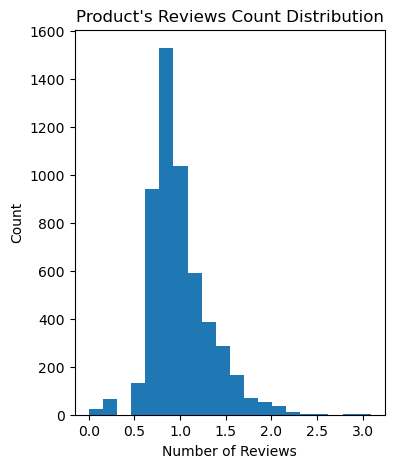

In [15]:
plt.figure(figsize=(4, 5))
plt.hist(np.log10(num_across_products.values),bins=20)
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.title("Product's Reviews Count Distribution")
plt.show()

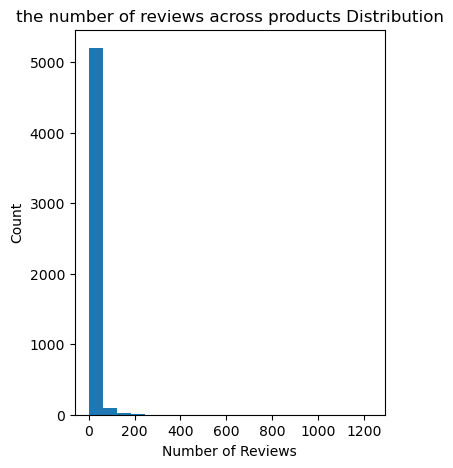

In [16]:
plt.figure(figsize=(4, 5))
plt.hist(num_across_products.values,bins=20)
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.title("the number of reviews across products Distribution")
plt.show()

In [17]:
# c. Distribution of the number of reviews per product

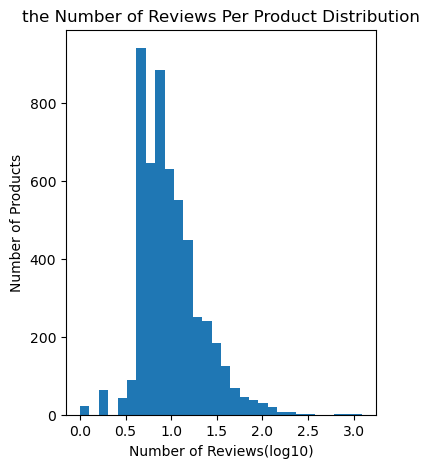

In [18]:
plt.figure(figsize=(4, 5))
plt.hist(np.log10(num_across_products.values), bins=30)
plt.xlabel('Number of Reviews(log10)')
plt.ylabel('Number of Products')
plt.title('the Number of Reviews Per Product Distribution')
plt.show()

In [19]:
# d. Distribution of reviews per user

In [20]:
num_reviews_user = data['reviewerID'].value_counts()
print(num_reviews_user)

reviewerID
A3L1VJMHFWONCB    99
A2W19IAPS7ZSDK    64
A2JZUUAAK3HNHS    61
A3OXHLG6DIBRW8    55
A2J2MQ45S3N25N    47
                  ..
A2FGD486F64BYM     4
A1MRD8YEY0IVCB     4
A3A2555BBGXNMI     4
A15CSHMACOQ70J     3
A36UN90WLZ5X10     2
Name: count, Length: 11041, dtype: int64


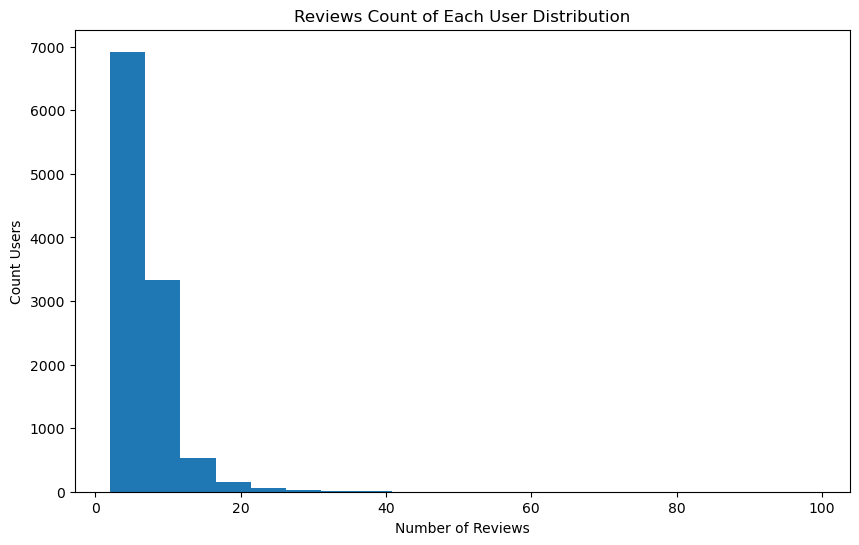

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(num_reviews_user.values, bins=20)
plt.xlabel('Number of Reviews')
plt.ylabel('Count Users')
plt.title('Reviews Count of Each User Distribution')
plt.show()

In [22]:
# e. Review lengths and outliers

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77071 entries, 0 to 77070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         77071 non-null  int64 
 1   verified        77071 non-null  bool  
 2   reviewTime      77071 non-null  object
 3   reviewerID      77071 non-null  object
 4   asin            77071 non-null  object
 5   style           36037 non-null  object
 6   reviewerName    77044 non-null  object
 7   reviewText      77060 non-null  object
 8   summary         77061 non-null  object
 9   unixReviewTime  77071 non-null  int64 
 10  vote            9620 non-null   object
 11  image           1719 non-null   object
dtypes: bool(1), int64(2), object(9)
memory usage: 6.5+ MB


In [91]:
nan_rows = data[data['reviewText'].isna()]
nan_indices = nan_rows.index.tolist()
print(len(nan_indices))
print(nan_indices)

11
[603, 14747, 18813, 21401, 35713, 38271, 41986, 41987, 43997, 55969, 56410]


In [92]:
data_without_nan = data.fillna('')

In [93]:
data_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77071 entries, 0 to 77070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         77071 non-null  int64 
 1   verified        77071 non-null  bool  
 2   reviewTime      77071 non-null  object
 3   reviewerID      77071 non-null  object
 4   asin            77071 non-null  object
 5   style           77071 non-null  object
 6   reviewerName    77071 non-null  object
 7   reviewText      77071 non-null  object
 8   summary         77071 non-null  object
 9   unixReviewTime  77071 non-null  int64 
 10  vote            77071 non-null  object
 11  image           77071 non-null  object
dtypes: bool(1), int64(2), object(9)
memory usage: 6.5+ MB


In [94]:
review_lenths = [] 

for review in data_without_nan["reviewText"]:
    len_review = len(review.split())
    review_lenths.append(len_review)

In [95]:
print(review_lenths)

[71, 5, 46, 2, 19, 2, 42, 11, 6, 17, 19, 42, 74, 42, 24, 52, 23, 2, 65, 17, 2, 17, 58, 27, 42, 2, 45, 28, 32, 45, 21, 167, 20, 25, 149, 2, 7, 18, 1, 1, 10, 6, 24, 63, 89, 10, 9, 2, 41, 7, 18, 13, 22, 4, 730, 211, 35, 48, 56, 25, 28, 71, 71, 447, 484, 141, 330, 120, 120, 120, 95, 58, 37, 4, 2, 5, 30, 7, 2, 22, 2, 3, 70, 45, 23, 50, 39, 35, 15, 279, 24, 33, 13, 4, 16, 20, 20, 141, 11, 1, 7, 28, 24, 8, 6, 6, 5, 24, 3, 23, 5, 65, 5, 35, 3, 7, 1, 9, 34, 2, 6, 14, 2, 76, 3, 7, 24, 42, 4, 7, 6, 26, 6, 6, 2, 12, 3, 4, 22, 5, 4, 1, 18, 1, 7, 4, 48, 3, 29, 25, 1, 11, 16, 23, 18, 12, 35, 4, 3, 10, 13, 3, 29, 45, 9, 9, 5, 2, 16, 12, 2, 4, 4, 3, 12, 30, 28, 59, 59, 90, 11, 21, 3, 1, 33, 39, 3, 14, 10, 5, 5, 29, 54, 69, 44, 30, 7, 5, 2, 22, 44, 5, 23, 8, 5, 2, 96, 2, 17, 1, 6, 29, 1, 4, 14, 29, 5, 39, 2, 2, 113, 25, 23, 33, 20, 3, 27, 86, 24, 4, 22, 22, 93, 3, 9, 6, 35, 28, 22, 60, 2, 65, 6, 65, 59, 84, 27, 7, 7, 93, 6, 8, 35, 137, 118, 18, 40, 42, 27, 58, 87, 1, 2, 2, 11, 26, 1, 2, 37, 31, 20, 2, 2

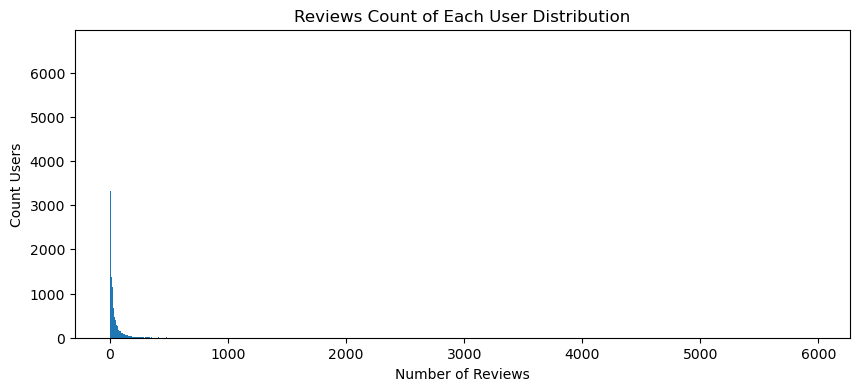

In [103]:
plt.figure(figsize=(10, 4))
plt.hist(review_lenths, bins=range(min(review_lenths), max(review_lenths) + 2))
plt.xlabel('Number of Reviews')
plt.ylabel('Count Users')
plt.title('Reviews Count of Each User Distribution')
plt.show()

In [ ]:
# f. Analyze lengths

In [ ]:
# g. Check for duplicates

In [ ]:
"""
2. Text basic pre-processing:
a.Label your data based on the value of “rating of the product” i.e. as follows:
i.Ratings 4,5: Positive
ii.Rating 3: Neutral
iii.Ratings 1,2: Negative
"""

In [ ]:
data_with_label = data

In [ ]:
label= []

for i,row in data_with_label.iterrows():
    if row['overall'] >= 4.0:
        label = "Positive"
    elif row['overall'] <= 1.0:
        label = "Negative"
    else:
        label = "Neutral"
        
data_with_label['label'] = label

In [ ]:
data_with_label.head()

In [ ]:
# Chose the appropriate columns for your sentiment analyzer. (Give this some thought) and mention in your report why you chose each column.